3
8
18
32
50
72
98
128
162
200
242
288
338
392
450
512
578
648
722
800
882
968
1058
1152
1250
1352
1458
1568
1682
1800
1922
2048
2178
2312
2450
2592
2738
2888
3042
3200
3362
3528
3698
3872
4050
4232
4418
4608
4802
5000
5202
5408
5618
5832
6050
6272
6498
6728
6962
7200
7442
7688
7938
8192
8450
8712
8978
9248
9522
9800
10082
10368
10658
10952
11250
11552
11858
12168
12482
12800
13122
13448
13778
14112
14450
14792
15138
15488
15842
16200
16562
16928
17298
17672
18050
18432
18818
19208
19602
20000


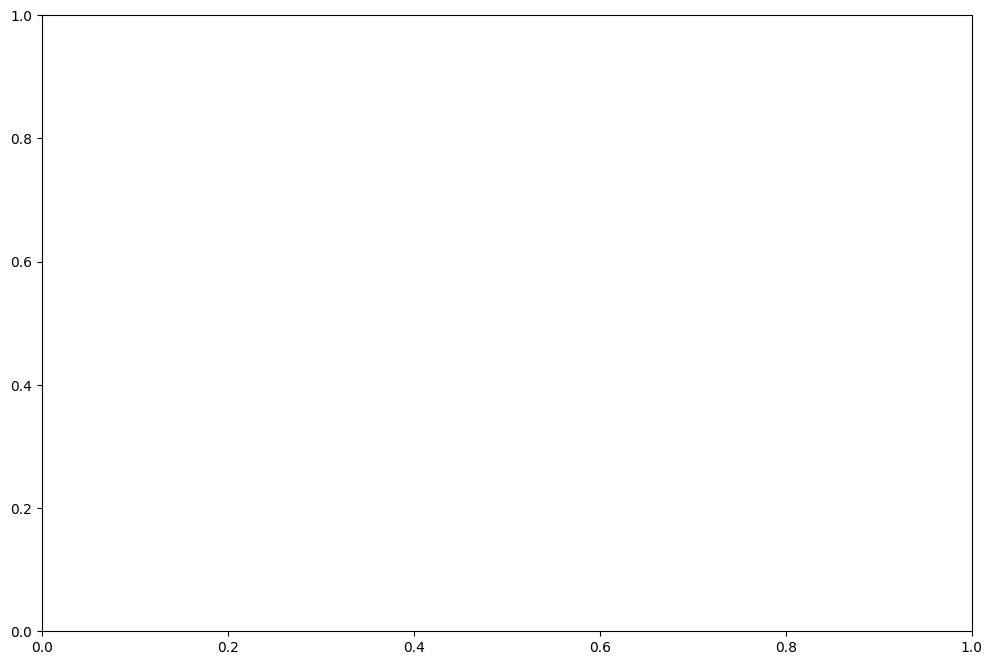

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time



eps0 = 8.85418782e-12
mu0 = 1.25663706e-6
c0 = 1/np.sqrt(eps0*mu0)
imp0 = np.sqrt(mu0/eps0)


imax = 500
isource = 250
jmax = 500
jsource = 250
nmax = 100

# Define initial field values to be transformed
Ex = np.zeros((imax,jmax))
Ey = np.zeros((imax,jmax))
Hz = np.zeros((imax,jmax))
Ex_prev = np.zeros((imax,jmax))
Ey_prev = np.zeros((imax,jmax))
Hz_prev = np.zeros((imax,jmax))


lambda_min = 350e-9
dx = lambda_min/20
dy = lambda_min/20
dt = dx/c0

eps = eps0
    


fig, ax = plt.subplots(figsize=(12,8))






def Source_Function(t):
    lambda_0 = 550e-9
    w0 = 2*np.pi*c0/lambda_0
    tau = 30
    t0 = tau*3
    

    return np.exp(-(t-t0)**2/tau**2)


Ex_lst = []


for n in range(nmax):

    #Hz[imax-1,jmax-1] = Hz_prev[imax-2,jmax-2]
    #Hz[imax-1,jmax-1] = Hz_prev[imax-1,jmax-2]

    for i in range(imax-1):
        for j in range(jmax-1):
            Hz[i,j] = Hz_prev[i,j] + dt/(dy*mu0)*(Ex[i,j+1]-Ex[i,j])\
                      - dt/(dx*mu0)*(Ey[i+1,j+1]-Ey[i,j])
            Hz_prev[i,j] = Hz[i,j]
    
    Hz[isource-1,jsource-1] -= Source_Function(n)/imp0
    Hz_prev[isource-1,jsource-1] = Hz[isource-1,jsource-1]


    #Ex[0,0] = Ex_prev[1,1]
    #Ey[0,0] = Ey_prev[1,1]

    for i in range(1,imax):
        for j in range(1,jmax):
            Ex[i,j] = Ex_prev[i,j] + dt/(dy*eps)*(Hz[i,j]-Hz[i,j-1])
            Ex_prev[i,j] = Ex[i,j]

            Ey[i,j] = Ey_prev[i,j] + dt/(dx*eps)*(Hz[i,j]-Hz[i-1,j])
            Ey_prev[i,j] = Ey[i,j]


    
    Ex[isource, jsource] += Source_Function(n+1)
    Ex_prev[isource, jsource] = Ex[isource, jsource]

    Ey[isource, jsource] += Source_Function(n+1)
    Ey_prev[isource, jsource] = Ey[isource, jsource]
    

    print(np.count_nonzero(Ex))

    if n%10==0:
        Ex_lst.append(Ex)

In [2]:
print(len(Ex_lst))

10


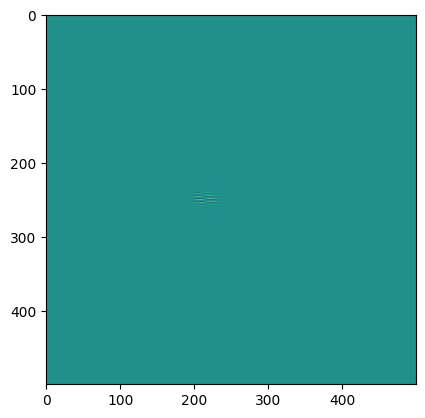

In [10]:
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.imshow(Ex_lst[-5])